# Importing Libraries

In [50]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import roc_auc_score,roc_curve

# Importing DataSet

In [51]:
bank_data=pd.read_csv('bank-full.csv',sep=';')
bank_data.head(10)


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
5,35,management,married,tertiary,no,231,yes,no,unknown,5,may,139,1,-1,0,unknown,no
6,28,management,single,tertiary,no,447,yes,yes,unknown,5,may,217,1,-1,0,unknown,no
7,42,entrepreneur,divorced,tertiary,yes,2,yes,no,unknown,5,may,380,1,-1,0,unknown,no
8,58,retired,married,primary,no,121,yes,no,unknown,5,may,50,1,-1,0,unknown,no
9,43,technician,single,secondary,no,593,yes,no,unknown,5,may,55,1,-1,0,unknown,no


# Initial Ananlysis

In [52]:
bank_data.shape

(45211, 17)

In [53]:
bank_data.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [54]:
bank_data.dtypes

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
y            object
dtype: object

In [55]:
bank_data.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


# Data Preparation
### Data Transformation
#### Some features of our data is categorical which machine cannot Predict well so we perform
     * Label Encoder

In [56]:
from sklearn.preprocessing import LabelEncoder

In [57]:
le=LabelEncoder()

In [58]:
bank_data['job']=le.fit_transform(bank_data.job)
bank_data['marital']=le.fit_transform(bank_data.marital)
bank_data['education']=le.fit_transform(bank_data.education)
bank_data['default']=le.fit_transform(bank_data.default)
bank_data['housing']=le.fit_transform(bank_data.housing)
bank_data['loan']=le.fit_transform(bank_data.loan)
bank_data['y']=le.fit_transform(bank_data.y)
bank_data['month']=le.fit_transform(bank_data.month)
bank_data['contact']=le.fit_transform(bank_data.contact)
bank_data['poutcome']=le.fit_transform(bank_data.poutcome)

In [59]:
bank_data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,4,1,2,0,2143,1,0,2,5,8,261,1,-1,0,3,0
1,44,9,2,1,0,29,1,0,2,5,8,151,1,-1,0,3,0
2,33,2,1,1,0,2,1,1,2,5,8,76,1,-1,0,3,0
3,47,1,1,3,0,1506,1,0,2,5,8,92,1,-1,0,3,0
4,33,11,2,3,0,1,0,0,2,5,8,198,1,-1,0,3,0


In [60]:
bank_data.corr()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
age,1.000000,-0.021868,-0.403240,-0.106807,-0.017879,0.097783,-0.185513,-0.015655,0.026221,-0.009120,-0.042357,-0.004648,0.004760,-0.023758,0.001288,0.007367,0.025155
job,-0.021868,1.000000,0.062045,0.166707,-0.006853,0.018232,-0.125363,-0.033004,-0.082063,0.022856,-0.092870,0.004744,0.006839,-0.024455,-0.000911,0.011010,0.040438
marital,-0.403240,0.062045,1.000000,0.108576,-0.007023,0.002122,-0.016096,-0.046893,-0.039201,-0.005261,-0.006991,0.011852,-0.008994,0.019172,0.014973,-0.016850,0.045588
education,-0.106807,0.166707,0.108576,1.000000,-0.010718,0.064514,-0.090790,-0.048574,-0.110928,0.022671,-0.057304,0.001935,0.006255,0.000052,0.017570,-0.019361,0.066241
default,-0.017879,-0.006853,-0.007023,-0.010718,1.000000,-0.066745,-0.006025,0.077234,0.015404,0.009424,0.011486,-0.010021,0.016822,-0.029979,-0.018329,0.034898,-0.022419
balance,0.097783,0.018232,0.002122,0.064514,-0.066745,1.000000,-0.068768,-0.084350,-0.027273,0.004503,0.019777,0.021560,-0.014578,0.003435,0.016674,-0.020967,0.052838
housing,-0.185513,-0.125363,-0.016096,-0.090790,-0.006025,-0.068768,1.000000,0.041323,0.188123,-0.027982,0.271481,0.005075,-0.023599,0.124178,0.037076,-0.099971,-0.139173
loan,-0.015655,-0.033004,-0.046893,-0.048574,0.077234,-0.084350,0.041323,1.000000,-0.010873,0.011370,0.022145,-0.012412,0.009980,-0.022754,-0.011043,0.015458,-0.068185
contact,0.026221,-0.082063,-0.039201,-0.110928,0.015404,-0.027273,0.188123,-0.010873,1.000000,-0.027936,0.361145,-0.020839,0.019614,-0.244816,-0.147811,0.272214,-0.148395
day,-0.009120,0.022856,-0.005261,0.022671,0.009424,0.004503,-0.027982,0.011370,-0.027936,1.000000,-0.006028,-0.030206,0.162490,-0.093044,-0.051710,0.083460,-0.028348


# Model Building`

In [61]:
from sklearn.model_selection import train_test_split

In [62]:
x=bank_data.drop(columns=['y'],axis=1)
y=bank_data.y

In [63]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=1)

In [64]:
x_train.shape

(36168, 16)

In [65]:
x_test.shape

(9043, 16)

# Model Training

In [66]:
from sklearn.linear_model import LogisticRegression

In [67]:
log_model=LogisticRegression()

In [68]:
log_model.fit(x_train,y_train)

C:\Users\HP\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [69]:
y_pred_train=log_model.predict(x_train)

# Model Testing

In [70]:
y_pred=log_model.predict(x_test)

# Model Evaluation

In [71]:
from sklearn.metrics import confusion_matrix,accuracy_score

In [72]:
accuracy_score(y_train,y_pred_train)

0.8876078301260784

In [73]:
accuracy_score(y_test,y_pred)

0.8876479044564857

In [74]:
confusion_matrix(y_test,y_pred)

array([[7841,  152],
       [ 864,  186]], dtype=int64)

# Model Optimization
#### Try to increase accuracy by scaling the data using Standard Sacalar

In [75]:
from sklearn.preprocessing import StandardScaler

In [76]:
sts=StandardScaler()

In [77]:
scaled_bank_data=sts.fit_transform(bank_data)

In [78]:
scaled_bank_data=pd.DataFrame(scaled_bank_data,columns=bank_data.columns)

In [79]:
scaled_bank_data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,1.606965,-0.103820,-0.275762,1.036362,-0.13549,0.256419,0.893915,-0.436803,1.514306,-1.298476,0.823773,0.011016,-0.569351,-0.411453,-0.25194,0.444898,-0.363983
1,0.288529,1.424008,1.368372,-0.300556,-0.13549,-0.437895,0.893915,-0.436803,1.514306,-1.298476,0.823773,-0.416127,-0.569351,-0.411453,-0.25194,0.444898,-0.363983
2,-0.747384,-0.714951,-0.275762,-0.300556,-0.13549,-0.446762,0.893915,2.289359,1.514306,-1.298476,0.823773,-0.707361,-0.569351,-0.411453,-0.25194,0.444898,-0.363983
3,0.571051,-1.020516,-0.275762,2.373280,-0.13549,0.047205,0.893915,-0.436803,1.514306,-1.298476,0.823773,-0.645231,-0.569351,-0.411453,-0.25194,0.444898,-0.363983
4,-0.747384,2.035139,1.368372,2.373280,-0.13549,-0.447091,-1.118674,-0.436803,1.514306,-1.298476,0.823773,-0.233620,-0.569351,-0.411453,-0.25194,0.444898,-0.363983


In [80]:
x_scaled=scaled_bank_data.drop(columns=['y'],axis=1)
y_=bank_data.y

In [81]:
x_scaled_train,x_scaled_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.20,random_state=1)

In [82]:
log_model.fit(x_scaled_train,y_train)

LogisticRegression()

In [83]:
y_pred=log_model.predict(x_scaled_test)

# Model Optimization 
#### Checking the accuracy if it is increased or not

In [84]:
accuracy_score(y_test,y_pred)

0.8909653875926131

In [85]:
y_scaled_pred=log_model.predict(x_scaled_train)

In [86]:
accuracy_score(y_train,y_scaled_pred)

0.8912021676620216

In [87]:
confusion_matrix(y_test,y_pred)

array([[7837,  156],
       [ 830,  220]], dtype=int64)

Text(0, 0.5, 'True Positive Rate')

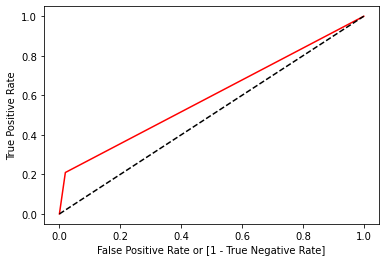

In [89]:
fpr, tpr, thresholds = roc_curve(y_test,y_pred)

auc = roc_auc_score(y_test, y_pred)

import matplotlib.pyplot as plt
plt.plot(fpr, tpr, color='red', label='logit model ( area  = %0.2f)'%auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
plt.ylabel('True Positive Rate')


In [286]:
# Here we see that the accuracy score for Test Data is 89% which is good so it is the best accuracy we get from this model.....